# Nama: Akhmad Haris
# Nim: A11.2022.14626 

### PRODUKSI PADI                   

In [12]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
import numpy as np
from tabulate import tabulate
import matplotlib.pyplot as plt

In [13]:
# Load dataset
file_path = 'produksiPadi.xlsx'  # Ganti dengan lokasi file Anda
data = pd.read_excel(file_path, sheet_name='data training')

In [14]:
# Menambahkan kolom lagging
data['Produksi_Lag'] = data['Produksi Padi(Ton)'].shift(1)
data = data.dropna()  # Hapus nilai NaN akibat lagging

#### Menambahkan Kolom Lagging :

- Kolom Produksi_Lag dibuat untuk menyimpan data produksi padi dari tahun sebelumnya, memungkinkan analisis hubungan antara produksi saat ini dan produksi sebelumnya.
- Baris dengan nilai NaN akibat lagging dihapus untuk memastikan data bersih.

In [15]:
# Define features (X) dan target (y)
X = data[['Produksi_Lag']]
y = data['Produksi Padi(Ton)']

# Split dataset (70% training, 30% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, shuffle=False)

#### Membagi Dataset :

- Data dibagi menjadi 70% untuk training (melatih model) dan 30% untuk testing (mengukur performa model).
- Tidak ada pengacakan (shuffle=False) untuk menjaga urutan waktu.

In [16]:
# Model Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

# Prediksi untuk data testing
y_pred = model.predict(X_test)

#### Model Linear Regression :

- Model regresi linear dilatih menggunakan data training.
- Model mencoba memahami hubungan linier antara Produksi_Lag (produksi tahun sebelumnya) dan Produksi Padi(Ton) (produksi tahun saat ini).

In [17]:
# Evaluasi model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mape = mean_absolute_percentage_error(y_test, y_pred)

# Tampilkan evaluasi dalam tabel
evaluasi = [["MSE", f"{mse:.2f}"],
            ["RMSE", f"{rmse:.2f}"],
            ["MAPE (%)", f"{mape * 100:.2f}"]]
print("\nEvaluasi Model:")
print(tabulate(evaluasi, headers=["Metode", "Hasil"], tablefmt="fancy_grid"))


Evaluasi Model:
╒══════════╤═════════════╕
│ Metode   │       Hasil │
╞══════════╪═════════════╡
│ MSE      │ 3.67881e+13 │
├──────────┼─────────────┤
│ RMSE     │ 6.06532e+06 │
├──────────┼─────────────┤
│ MAPE (%) │ 5.56        │
╘══════════╧═════════════╛


#### Evaluasi Model :

- MSE (Mean Squared Error): Mengukur rata-rata kuadrat kesalahan prediksi. Semakin kecil nilainya, semakin baik model.
- RMSE (Root Mean Squared Error): Akar kuadrat dari MSE, memberikan unit yang sama dengan data asli.
- MAPE (Mean Absolute Percentage Error): Mengukur kesalahan rata-rata dalam bentuk persentase. Nilai MAPE kecil (misalnya, di bawah 10%) menunjukkan model yang sangat akurat.

In [22]:
# Prediksi untuk tahun 2023 dan 2024
latest_production = data['Produksi Padi(Ton)'].iloc[-1]
pred_2023 = model.predict([[latest_production]])
pred_2024 = model.predict([[pred_2023[0]]])

# Tampilkan prediksi dalam tabel
prediksi = [["2023", f"{pred_2023[0]:,.2f} Ton"],
            ["2024", f"{pred_2024[0]:,.2f} Ton"]]
print("\nPrediksi Produksi Padi:")
print(tabulate(prediksi, headers=["Tahun", "Produksi"], tablefmt="fancy_grid"))


Prediksi Produksi Padi:
╒═════════╤═══════════════════╕
│   Tahun │ Produksi          │
╞═════════╪═══════════════════╡
│    2023 │ 54,928,021.58 Ton │
├─────────┼───────────────────┤
│    2024 │ 55,502,340.65 Ton │
╘═════════╧═══════════════════╛


C:\Users\bimoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\bimoc\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


#### Prediksi Tahun 2023 dan 2024 :

- Prediksi didasarkan pada nilai produksi terakhir di data.
- Prediksi tahun 2023 menggunakan hasil tahun terakhir dalam data.
- Prediksi tahun 2024 menggunakan hasil prediksi untuk tahun 2023.

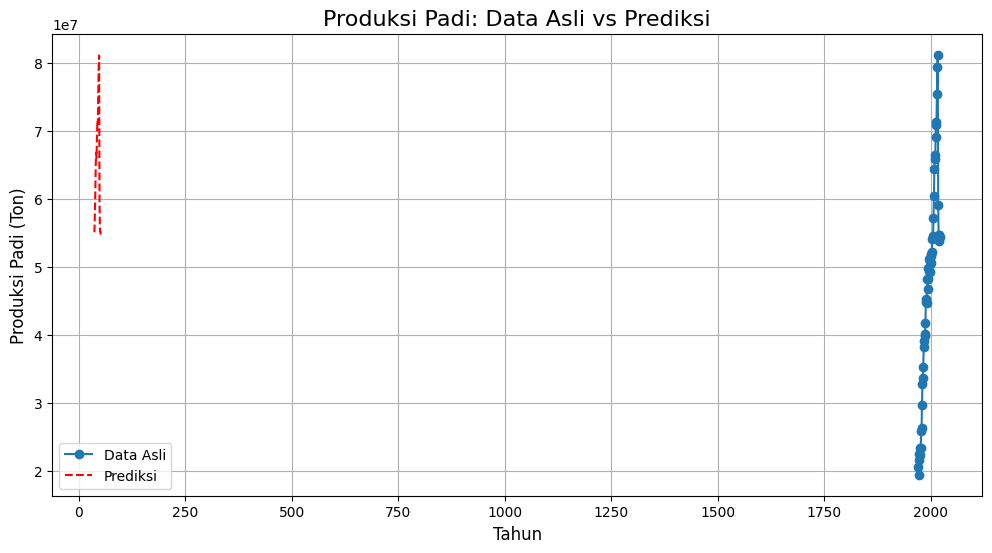

In [10]:
# Plot data asli dan prediksi
plt.figure(figsize=(12, 6))
plt.plot(data['Tahun'], data['Produksi Padi(Ton)'], label='Data Asli', marker='o')
plt.plot(X_test.index, y_pred, label='Prediksi', linestyle='--', color='red')
plt.title("Produksi Padi: Data Asli vs Prediksi", fontsize=16)
plt.xlabel("Tahun", fontsize=12)
plt.ylabel("Produksi Padi (Ton)", fontsize=12)
plt.legend()
plt.grid()
plt.show()

#### Visualisasi :

- Data Asli ditampilkan sebagai grafik garis dengan titik-titik (biru).
- Prediksi untuk data testing ditampilkan sebagai garis putus-putus (merah).
- Grafik ini memudahkan untuk membandingkan data asli dengan hasil prediksi model.